# Importing Standard Libraries

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import neural_network as mynnetclf

# I've enclosed neural_network.py in local file path.

### In this manner methods from NeuralNetworkClassifier can be used.

In [2]:
import importlib
importlib.reload(mynnetclf)

<module 'neural_network' from 'C:\\Users\\decim\\Desktop\\Abdullah Ahmadoh ass3\\neural_network.py'>

# `partition()` Function

###The data is already partitioned, but we combine the partitions in one matrix and split it again. 

###`partition()` is used t=to split the dataset into training, validation and test sets.

### `partition()` consideres the class labels distribution when splitting the dataset.

In [3]:
def partition(X, T, fractions):
    
    train_fraction = fractions[0]
    if len(fractions) == 2:
        # Skip the validation step
        validate_fraction = 0
        test_fraction = fractions[1]
    else:
        validate_fraction = fractions[1]
        test_fraction = fractions[2]
        
    row_indices = np.arange(X.shape[0])
    
    np.random.shuffle(row_indices)
    
    # classifying, so partition data according to target class
    classes = np.unique(T)
    train_indices = []
    validate_indices = []
    test_indices = []
    for c in classes:
        # row indices for class c
        rows_this_class = np.where(T[row_indices,:] == c)[0]
        # collect row indices for class c for each partition
        n = len(rows_this_class)
        n_train = round(train_fraction * n)
        n_validate = round(validate_fraction * n)
        n_test = round(test_fraction * n)
        if n_train + n_validate + n_test > n:
            n_test = n - n_train - n_validate
        train_indices += row_indices[rows_this_class[:n_train]].tolist()
        if n_validate > 0:
            validate_indices += row_indices[rows_this_class[n_train:n_train + n_validate]].tolist()
        test_indices += row_indices[rows_this_class[n_train + n_validate:n_train + n_validate + n_test]].tolist()
    Xtrain = X[train_indices, :]
    Ttrain = T[train_indices, :]
    if n_validate > 0:
        Xvalidate = X[validate_indices, :]
        Tvalidate = T[validate_indices, :]
    Xtest = X[test_indices, :]
    Ttest = T[test_indices, :]
    if n_validate > 0:
        return Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest
    else:
        return Xtrain, Ttrain, Xtest, Ttest

In [4]:
import pickle
import gzip

# Downloaded dataset of MNIST digits from [here](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true)

In [5]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)


(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


# `draw_image()` function displays the images present in the dataset in the form of squares filled with pixels.

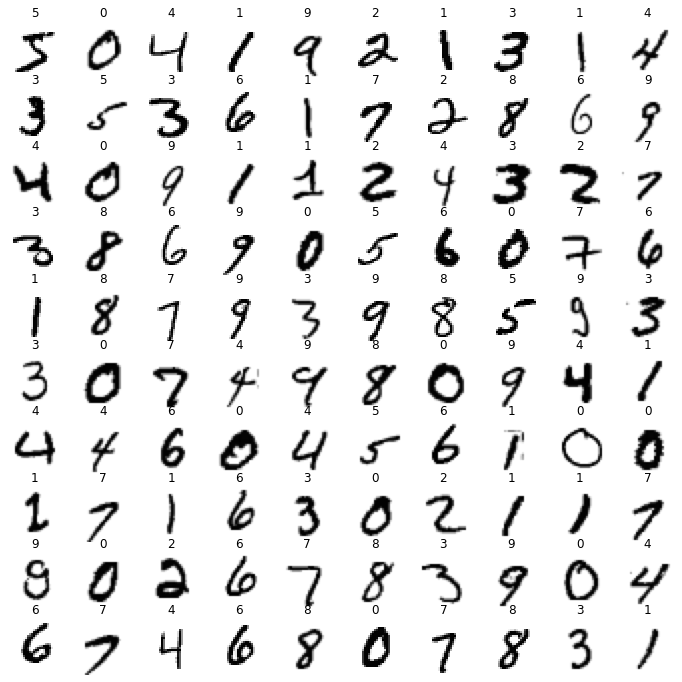

In [6]:
def draw_image(image, label):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    # plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(label)

plt.figure(figsize=(12, 12))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_image(Xtrain[i], Ttrain[i,0])

In [7]:
# Combine all paritions and split the combined data again using the method partition

X = np.vstack((Xtrain,Xval))
X = np.vstack((X,Xtest))

T = np.vstack((Ttrain,Tval))
T = np.vstack((T,Ttest))

print(X.shape, T.shape)
Xtrain, Ttrain, Xval, Tval, Xtest, Ttest = partition(X, T, (0.6, 0.2, 0.2))
print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(70000, 784) (70000, 1)
(42001, 784) (42001, 1) (14001, 784) (14001, 1) (13997, 784) (13997, 1)


In [8]:
def train_mini_batch(self, X, T, n_epochs, learning_rate=0.01, batch_size = 50, verbose=True):

        self.stand_params = self.calc_standardize_parameters(X, T)
        Xst = self.standardize_X(X)
        self.classes, counts = np.unique(T, return_counts=True)

        if self.n_outputs != len(self.classes):
            raise ValueError(f'''the number of outputs must equal the number of classes in the training data.''')


        def error_convert(negLL):
            #print(negLL)
            return np.exp(-negLL)
        
        
        T_encode = self.encoding_(T)
        
        error_trace = sgd_mini_batch(self , self.neg_log_likelihood, self.backward, [Xst, T_encode],\
                                n_epochs, learning_rate, batch_size,verbose=verbose)   
                
        return self


In [9]:
def sgd_mini_batch(self, error_f, gradient_f, fargs, n_epochs=100, learning_rate=0.001, batch_size = 50,\
                   save_wtrace=False,
            verbose=True, error_convert_f=None):
        error_trace = []
        weights_trace = []

        if save_wtrace:
            weights_trace = [self.all_weights.copy()]
        epochs_print = 5

        # ToDo

        Xst = fargs[0]
        T_encode = fargs[1]
        indices = np.arange(len(Xst))

        for epoch in range(n_epochs):

            np.random.shuffle(indices)
            # loop over all instances in each epoch
            for k in np.arange(0, Xst.shape[0], batch_size):

                # ToDo

                Xst_mini = Xst[indices[ k : k + batch_size   ]]
                T_mini = T_encode[indices[ k :  k + batch_size  ]]
                
                error = error_f(*[Xst_mini , T_mini]  )
                grad = gradient_f(*[Xst_mini , T_mini]  )

                # Update all weights
                self.all_weights -= learning_rate * grad

                if error_convert_f:
                    error = error_convert_f(error)
                error_trace.append(error)

                if save_wtrace:
                    weights_trace.append(self.all_weights.copy())

            if verbose and ((epoch + 1) % epochs_print == 0):
                error_scalar = np.asscalar(np.mean(error_trace)) if isinstance(np.mean(error_trace), np.ndarray) else np.mean(error_trace)
                print(f'sgd: Epoch {epoch+1:d} Error={error_scalar:.5f}')
            

        return (error_trace, np.array(weights_trace)) if save_wtrace else error_trace



# Explanation of `sgd_mini_batch()`

`indices = np.arange(len(Xst))` - for that we first create lindices array with indices of all training data for later sampling from dataset

`Xst_mini = Xst[indices[ k : k + batch_size   ]] and T_mini = T_encode[indices[ k :  k + batch_size  ]]` - for each epoch we sample the data set batches of 50 samples at a time using indices array for both training data and target data sets.

`error = error_f(*[Xst_mini , T_mini]  ) and grad = gradient_f(*[Xst_mini , T_mini]  )` - compute gradient and loss functions for mini batches of data

`self.all_weights -= learning_rate * grad` - update the model weights using gradient descent method

In [10]:
def train_val_epoch(Xtrain, Ttrain, Xval, Tval, n_epochs, n_use, n_hiddens_list, learning_rate, verbose=True):
    
    nnet = mynnetclf.NeuralNetworkClassifier(Xtrain.shape[1], n_hiddens_list, len(np.unique(Ttrain)))
    
    results = []
    val_acc_list = []
    epoch_list = np.arange(n_epochs//n_use,n_epochs,n_epochs//n_use)
    for epoch in epoch_list:
        
        # ToDo

        train_mini_batch(nnet, Xtrain , Ttrain, epoch, 
                         learning_rate=0.01, batch_size = 50, verbose=False)
        
        t_result = nnet.use(Xtrain)
        t_acc = nnet.accuracy_(nnet.use(Xtrain)[0], Ttrain)
        t_out = [t_result[0] , t_result[1] , t_acc]

        v_result = nnet.use(Xval)
        v_acc = nnet.accuracy_(nnet.use(Xval)[0], Tval)
        v_out = [v_result[0] , v_result[1] , v_acc]

        results.append(t_out)
        results.append(v_out)
        val_acc_list.append(v_acc)

        nnet.initialize_weights()

        print("sgd number of epochs : {} Train accuracy : {:.6f} validation accuracy : {:.6f}".format(
            epoch ,
            t_acc ,
            v_acc
        ))

    best_epoch = epoch_list[np.argmax(val_acc_list)]

    return results,best_epoch

# Explanation of `train_val_epoch()`

`nnet = mynnetclf.NeuralNetworkClassifier(Xtrain.shape[1], n_hiddens_list, len(np.unique(Ttrain)))` - define the neural network model with appropriate shapes and hidden layers with target sizes.

`train_mini_batch(nnet, Xtrain , Ttrain, epoch,learning_rate=0.01, batch_size = 50, verbose=False)` - model training with the train data and specific epoch number.

`t_result = nnet.use(Xtrain)
t_acc = nnet.accuracy_(nnet.use(Xtrain)[0], Ttrain)
t_out = [t_result[0] , t_result[1] , t_acc]` -  model evaluation on training data and obtain model accuracy using ( nnet.use )

`v_result = nnet.use(Xval)
 v_acc = nnet.accuracy_(nnet.use(Xval)[0], Tval)
 v_out = [v_result[0] , v_result[1] , v_acc]` - model evaluation on validation data and model obtain model accuracies for each epoch and append to a list
 
`best_epoch = epoch_list[np.argmax(val_acc_list)]` - get the best epoch value using the validation accuracy results 

In [11]:
n_hiddens_list =[10]
n_epochs = 201
n_use = 20
learning_rate = 0.01
results,best_n_epoch = train_val_epoch(Xtrain, Ttrain, Xval, Tval, n_epochs,n_use, n_hiddens_list, learning_rate)

sgd number of epochs : 10 Train accuracy : 85.386062 validation accuracy : 85.586744
sgd number of epochs : 20 Train accuracy : 88.859789 validation accuracy : 88.986501
sgd number of epochs : 30 Train accuracy : 90.459751 validation accuracy : 89.986430
sgd number of epochs : 40 Train accuracy : 90.640699 validation accuracy : 90.050711
sgd number of epochs : 50 Train accuracy : 91.264494 validation accuracy : 90.614956
sgd number of epochs : 60 Train accuracy : 91.845432 validation accuracy : 90.679237
sgd number of epochs : 70 Train accuracy : 91.885907 validation accuracy : 90.814942
sgd number of epochs : 80 Train accuracy : 92.057332 validation accuracy : 90.836369
sgd number of epochs : 90 Train accuracy : 92.607319 validation accuracy : 91.400614
sgd number of epochs : 100 Train accuracy : 92.569225 validation accuracy : 91.222056
sgd number of epochs : 110 Train accuracy : 92.614462 validation accuracy : 91.200629
sgd number of epochs : 120 Train accuracy : 92.795410 validatio

# Same as before only change it now we change the learning rate values rather than epoch in previous method.

# Train_val_hidden - same as training model with different hidden sizes and evaluate results as before and get the best combination.

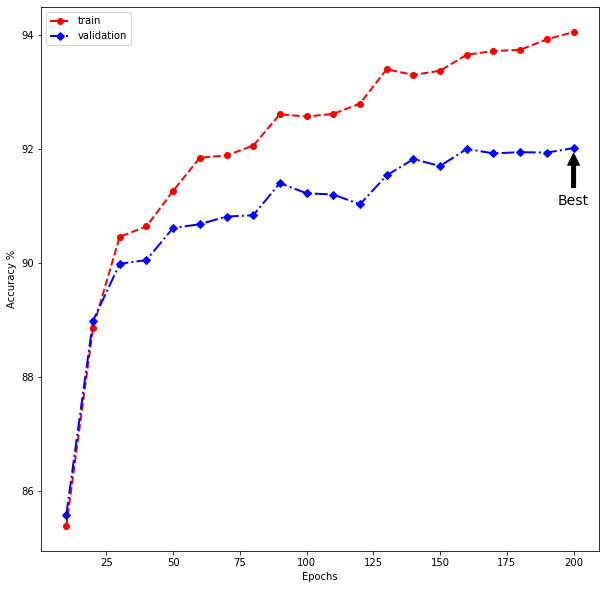

In [12]:
epoch_list = np.arange(n_epochs//n_use,n_epochs,n_epochs//n_use)

val_acc=[]
train_acc=[]
for i in np.arange(1,len(results),2):
    val_acc.append(results[i][2])
for i in np.arange(0,len(results),2):
    train_acc.append(results[i][2])


plt.figure(figsize=(10, 10))
plt.plot(epoch_list, train_acc, color='r', marker='o',linewidth=2.0,linestyle='dashed')
plt.plot(epoch_list, val_acc, color='b', marker='D',linewidth=2.0,linestyle='dashdot')
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Best', xytext=(best_n_epoch, max(val_acc)-1), xy=(best_n_epoch, max(val_acc)-0.01), arrowprops=props, fontsize=14, ha="center")
plt.legend(('train', 'validation'))
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.show()

In [13]:
def train_val_lambda(Xtrain, Ttrain, Xval, Tval, n_epochs, n_hiddens_list, learning_rate_list, verbose=True):
    
    nnet = mynnetclf.NeuralNetworkClassifier(Xtrain.shape[1], n_hiddens_list, len(np.unique(Ttrain)))
    
    
    results = []
    val_acc_list = []
    
    for lrate in learning_rate_list:
        

        # To Do
        #nnet = mynnetclf.NeuralNetworkClassifier(Xtrain.shape[1], n_hiddens_list, len(np.unique(Ttrain)))
        train_mini_batch(nnet, Xtrain , Ttrain, n_epochs, 
                         learning_rate = lrate , batch_size = 50, verbose=False)
        
        t_result = nnet.use(Xtrain)
        t_acc = nnet.accuracy_(nnet.use(Xtrain)[0], Ttrain)
        t_out = [t_result[0] , t_result[1] , t_acc]

        v_result = nnet.use(Xval)
        v_acc = nnet.accuracy_(nnet.use(Xval)[0], Tval)
        v_out = [v_result[0] , v_result[1] , v_acc]

        results.append(t_out)
        results.append(v_out)
        val_acc_list.append(v_acc)

        nnet.initialize_weights()

        print("sgd learning rate : {:.6f} Train accuracy : {:.6f} validation accuracy : {:.6f}".format(
            lrate ,
            t_acc ,
            v_acc
        ))
    
    best_learn_rate = learning_rate_list[np.argmax(val_acc_list)]

    return (results,best_learn_rate)

In [14]:
n_hiddens_list =[10]
n_epochs = 50
learning_rate_list = [0.001,0.01,0.1,0.5,1]
results,best_learn_rate = train_val_lambda(Xtrain, Ttrain, Xval, Tval, n_epochs, n_hiddens_list, learning_rate_list)

sgd learning rate : 0.001000 Train accuracy : 80.729030 validation accuracy : 80.829941
sgd learning rate : 0.010000 Train accuracy : 90.988310 validation accuracy : 90.129276
sgd learning rate : 0.100000 Train accuracy : 95.140592 validation accuracy : 91.907721
sgd learning rate : 0.500000 Train accuracy : 95.438204 validation accuracy : 91.364903
sgd learning rate : 1.000000 Train accuracy : 95.585819 validation accuracy : 90.950646


In [15]:
def train_val_hidden(Xtrain, Ttrain, Xval, Tval, n_epochs, n_hiddens_list, learning_rate, verbose=True):
    
    
    results = []
    val_acc_list = []
    
    for h in n_hiddens_list:
        
        # ToDo

        nnet = mynnetclf.NeuralNetworkClassifier(Xtrain.shape[1], h , len(np.unique(Ttrain)))
        train_mini_batch(nnet, Xtrain , Ttrain, n_epochs, 
                         learning_rate=learning_rate , batch_size = 50, verbose=False)
        
        t_result = nnet.use(Xtrain)
        t_acc = nnet.accuracy_(nnet.use(Xtrain)[0], Ttrain)
        t_out = [t_result[0] , t_result[1] , t_acc]

        v_result = nnet.use(Xval)
        v_acc = nnet.accuracy_(nnet.use(Xval)[0], Tval)
        v_out = [v_result[0] , v_result[1] , v_acc]

        results.append(t_out)
        results.append(v_out)
        val_acc_list.append(v_acc)

        nnet.initialize_weights()

        print("sgd hidden list : {} Train accuracy : {:.6f} validation accuracy : {:.6f}".format(
            h ,
            t_acc ,
            v_acc
        ))
    
    best_hidden = learning_rate_list[np.argmax(val_acc_list)]

    return (results,best_hidden)

In [16]:
n_hiddens_list =[[],[5],[10],[10,10],[10,10,10]]
n_epochs = 50
learning_rate = 0.1
results,best_hidden = train_val_hidden(Xtrain, Ttrain, Xval, Tval, n_epochs, n_hiddens_list, learning_rate)

sgd hidden list : [] Train accuracy : 93.883479 validation accuracy : 92.257696
sgd hidden list : [5] Train accuracy : 87.919335 validation accuracy : 85.736733
sgd hidden list : [10] Train accuracy : 94.883455 validation accuracy : 91.507749
sgd hidden list : [10, 10] Train accuracy : 95.547725 validation accuracy : 91.514892
sgd hidden list : [10, 10, 10] Train accuracy : 95.452489 validation accuracy : 91.200629


In [17]:
def multi_run(Xtrain, Ttrain, n_partitions, fractions, n_epochs, n_hiddens_list, \
              learning_rate,batch_size, verbose=True):
    
    
    results = []
    indices = np.arange(len(Xtrain))
    for rep in range(n_partitions):
        
        # ToDo

        np.random.shuffle(indices)
        tr_te_margin = int(len(indices)*fractions[0])
        te_va_margin = int(len(indices)*fractions[1])

        x_train = Xtrain[indices[ :tr_te_margin ]]
        x_valid = Xtrain[indices[ tr_te_margin : tr_te_margin + te_va_margin ]]  
        x_test = Xtrain[indices[ tr_te_margin + te_va_margin : ]]  


        y_train = Ttrain[indices[ :tr_te_margin ]]
        y_valid = Ttrain[indices[ tr_te_margin : tr_te_margin + te_va_margin ]]  
        y_test  = Ttrain[indices[ tr_te_margin + te_va_margin : ]] 


        # model intialization and traning
        nnet = mynnetclf.NeuralNetworkClassifier(x_train.shape[1], n_hiddens_list , len(np.unique(y_train)))
        train_mini_batch(nnet, x_train , y_train, n_epochs, 
                         learning_rate=learning_rate , batch_size = batch_size , verbose=False)
        
        # model validation
    
        train_Acc = nnet.accuracy_(nnet.use(x_train)[0], y_train)

        val_Acc = nnet.accuracy_(nnet.use(x_valid)[0], y_valid)

        test_Acc = nnet.accuracy_(nnet.use(x_test)[0], y_test)

        nnet.initialize_weights()
        
        structure = 'hiddens =' + str(n_hiddens_list) + ' ' + 'epochs =' + str(n_epochs) +\
                   ' ' + 'lambda = ' + str(learning_rate)
        results.extend([[structure, 'train', train_Acc],
                        [structure, 'validation', val_Acc],
                        [structure, 'test', test_Acc]])
        print()
    return results

# Explanation of `multi_run()`

`for rep in range(n_partitions):` iterate over every partition up to maximum values n_partictions

`tr_te_margin = int(len(indices)*fractions[0])` : identify the train_test split margin value 0.6*total data length then we split the data from that length to train and (test+validation) datasets 

`te_va_margin = int(len(indices)*fractions[1])` : each test and validation sets contain 0.2*total dataset length  split from that margin

`nnet = mynnetclf.NeuralNetworkClassifier(x_train.shape[1], n_hiddens_list , len(np.unique(y_train)))
        train_mini_batch(nnet, x_train , y_train, n_epochs, 
                         learning_rate=learning_rate , batch_size = batch_size , verbose=False)` - define the model with best parameters and model training with the defined training set
                         




In [18]:
n_hiddens_list =[10]
n_epochs = 50
learning_rate = 0.1
fractions = (0.6, 0.2, 0.2)
n_partitions = 10
batch_size = 50
results = multi_run(Xtrain, Ttrain, n_partitions,fractions,n_epochs, n_hiddens_list, learning_rate,batch_size)

In [19]:
import pandas as pd

resultsdf = pd.DataFrame(results, columns=('Structure', 'Partition', 'Accuracy'))
resultsdf

,Structure,Partition,Accuracy
0,hiddens =[10] epochs =50 lambda = 0.1,train,95.400794
1,hiddens =[10] epochs =50 lambda = 0.1,validation,91.500000
2,hiddens =[10] epochs =50 lambda = 0.1,test,91.001071
3,hiddens =[10] epochs =50 lambda = 0.1,train,95.083333
4,hiddens =[10] epochs =50 lambda = 0.1,validation,91.404762
5,hiddens =[10] epochs =50 lambda = 0.1,test,91.012975
6,hiddens =[10] epochs =50 lambda = 0.1,train,95.218254
7,hiddens =[10] epochs =50 lambda = 0.1,validation,90.880952
8,hiddens =[10] epochs =50 lambda = 0.1,test,91.405785
9,hiddens =[10] epochs =50 lambda = 0.1,train,95.388889


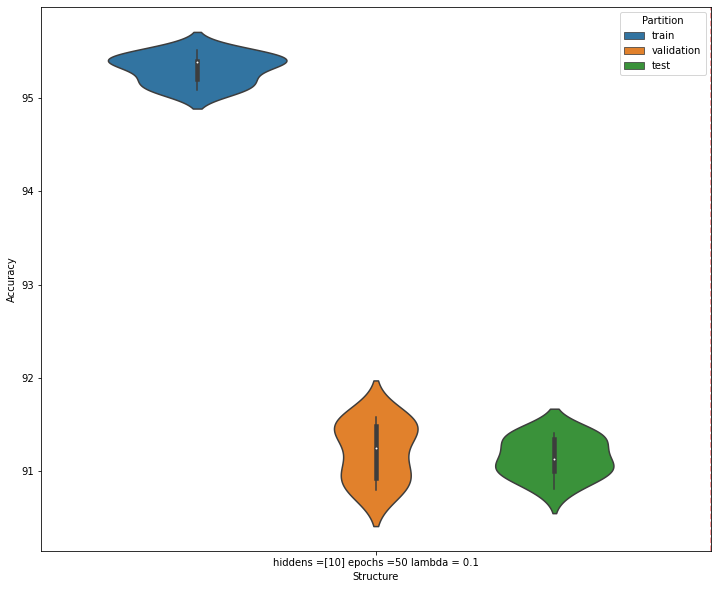

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.violinplot(x='Structure', y='Accuracy', hue='Partition', data=resultsdf)
for x in range(1):
    plt.axvline(x + 0.5, color='r', linestyle='--', alpha=0.5)

# Discussion of Results

Through the training-validation curve, we can see that we obtain the best results after training the sgd model for nearly 130 epochs.

On observing the violin plot, we can see that the IQR is smaller when compared to that of the complete size of the median for the Training set.

However, when the same comparision is done for the validation set, we can see that the IQR exceeds the median.

This is one of the many analysis that can be drawn by looking at the said plot.